<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Italy_K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [23]:
df= pd.read_excel("/content/Italy Barriers Evolution-For Segmentation-FMC SOB (1).xlsx")
df.head()

,Study Quarter,Unique Serial Number,Segments-Derived,Weight Final,Global Segment,Achievers,Aficionados,Conformists,Conscious,Savvy,...,HPTB-Burning/ tingling sensation in mouth/gums,HPTB-Too much nicotine hit,HPTB-Don’t like the aftertaste,HPTB-Flavour does not last long,HPTB-Flavour too intense,HPTB-Hassle to clean the device,HPTB-Damaged/ faulty pouch (powder/ loose ends etc.),HPTB-Unhygienic,HPTB-Do not get enough product satisfaction in the first couple of puffs,HPTB-Others
0,Q1 2024,4000009,0,1.307204,Achievers,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q1 2024,4000013,2,1.307204,Conformists,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q1 2024,4000020,3,2.215161,Savvy,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Q1 2024,4000023,3,2.708526,Conformists,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Q1 2024,4000033,0,1.847973,Conformists,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.columns

Index(['Study Quarter', 'Unique Serial Number', 'Segments-Derived',
       'Weight Final', 'Global Segment', 'Achievers', 'Aficionados',
       'Conformists', 'Conscious', 'Savvy',
       ...
       'HPTB-Burning/ tingling sensation in mouth/gums',
       'HPTB-Too much nicotine hit', 'HPTB-Don’t like the aftertaste',
       'HPTB-Flavour does not last long', 'HPTB-Flavour too intense',
       'HPTB-Hassle to clean the device',
       'HPTB-Damaged/ faulty pouch (powder/ loose ends etc.)',
       'HPTB-Unhygienic',
       'HPTB-Do not get enough product satisfaction in the first couple of puffs',
       'HPTB-Others'],
      dtype='object', length=126)

In [25]:
#df1=pd.get_dummies(df, columns=['Global Segment','Age','Sex', 'Income Groups','Category Frequency - Cigarette','Consideration HP','Consideration E-Cigarettes','Time Smoking - Cigarette','MOB-Tar','MOB-Price'])

In [31]:
columns_to_drop = ['Global Segment', 'Age', 'Sex','Income Groups','Category Frequency - Cigarette','Consideration HP','Consideration E-Cigarettes','Time Smoking - Cigarette','MOB-Tar','MOB-Price']
df1 = df.drop(columns=columns_to_drop)



In [32]:
string_columns = ['Study Quarter']

encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(df1[string_columns])

# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(string_columns))

# Drop the original string columns and concatenate the encoded columns
df_encoded = df1.drop(string_columns, axis=1).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

In [33]:
X = df_encoded.values

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

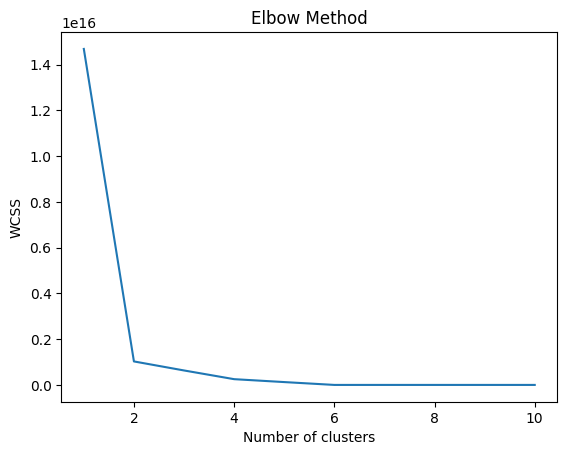

In [35]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

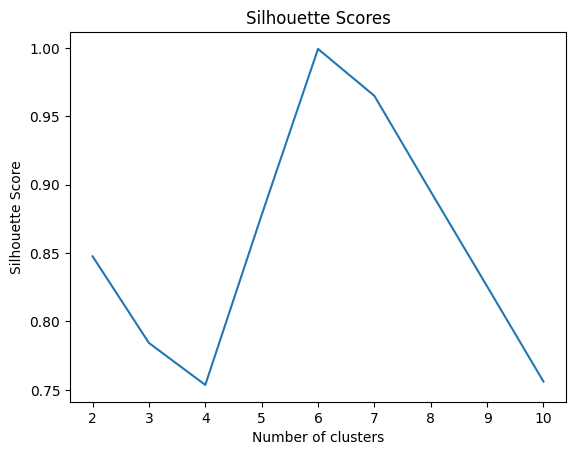

In [36]:
# Silhouette Scores to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [50]:

optimal_clusters = 5
# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=10, random_state=42)
kmeans.fit(X)



KMeans(max_iter=500, n_clusters=5, n_init=10, random_state=42)

In [51]:
# Predict the cluster labels
cluster_labels = kmeans.predict(X)

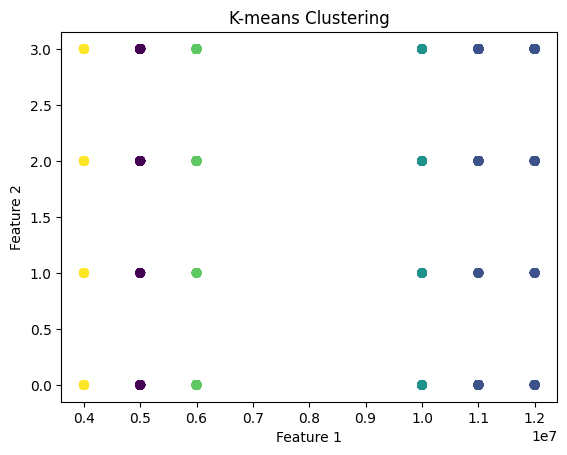

In [52]:
# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [55]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(X)

In [56]:
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
K = range(2, 11)  # Testing for 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)

In [58]:
# Silhouette Score
silhouette_avg = silhouette_score(df1_scaled, kmeans.labels_)
silhouette_scores.append(silhouette_avg)

Text(0.5, 1.0, 'Elbow Method')

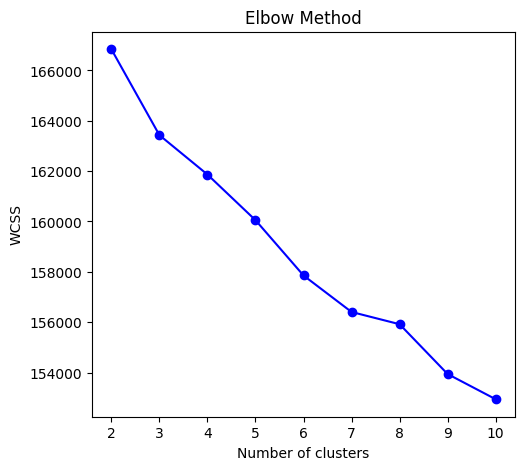

In [59]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

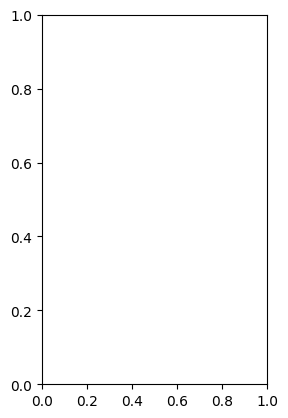

In [70]:
# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.show()
ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

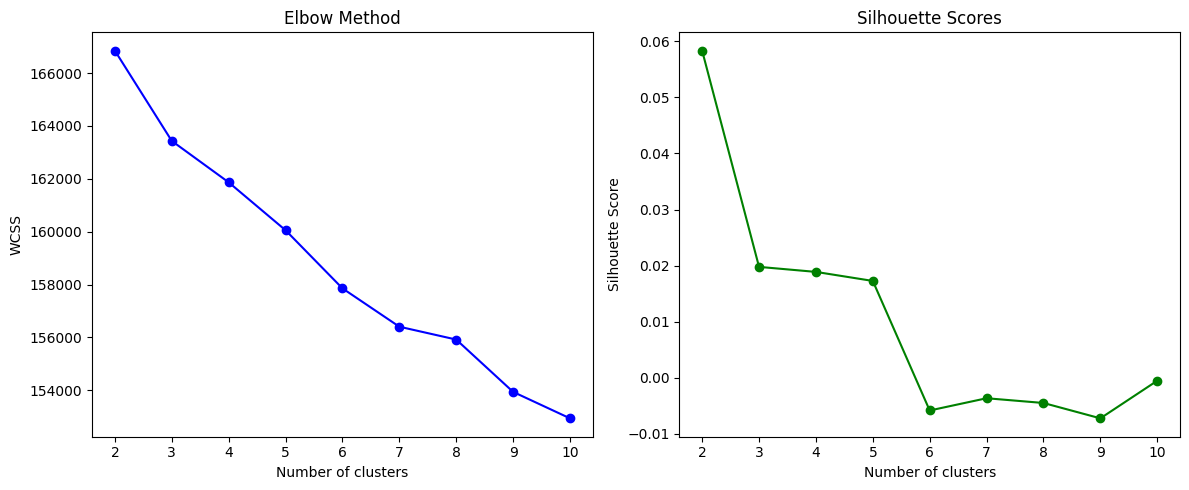

In [71]:
from sklearn.metrics import silhouette_score

# Initialize lists to store WCSS and Silhouette scores
wcss = []
silhouette_scores = []
K = range(2, 11)  # Test for 2 to 10 clusters

# Calculate WCSS and Silhouette scores for each k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)  # WCSS

    # Silhouette Score (only if k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(df1_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Silhouette Scores Plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()

In [79]:
# Step 3: Determine the optimal number of clusters
optimal_k = np.argmax(silhouette_scores) + 3  # +2 because we started from k=2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


In [80]:
# Step 4: Perform K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(df1_scaled)

KMeans(n_clusters=3, random_state=42)

In [81]:

# Add cluster labels to the original DataFrame
df1['Cluster'] = kmeans_optimal.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df1.head())

  Study Quarter  Unique Serial Number  Segments-Derived  Weight Final  \
0       Q1 2024               4000009                 0      1.307204   
1       Q1 2024               4000013                 2      1.307204   
2       Q1 2024               4000020                 3      2.215161   
3       Q1 2024               4000023                 3      2.708526   
4       Q1 2024               4000033                 0      1.847973   

   Achievers  Aficionados  Conformists  Conscious  Savvy  Traditionalists  \
0          1            0            0          0      0                0   
1          0            0            1          0      0                0   
2          0            0            0          0      1                0   
3          0            0            1          0      0                0   
4          0            0            1          0      0                0   

   ...  HPTB-Too much nicotine hit  HPTB-Don’t like the aftertaste  \
0  ...                      

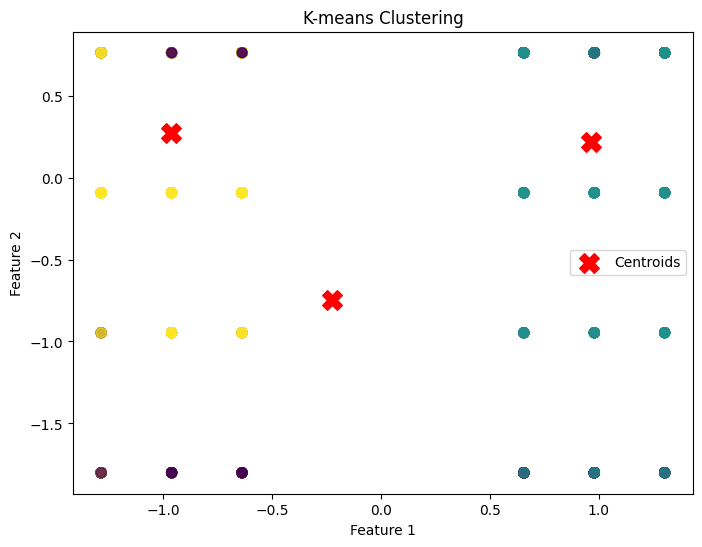

In [82]:
# Assuming df1 has 2 features (columns)
plt.figure(figsize=(8, 6))
plt.scatter(df1_scaled[:, 0], df1_scaled[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

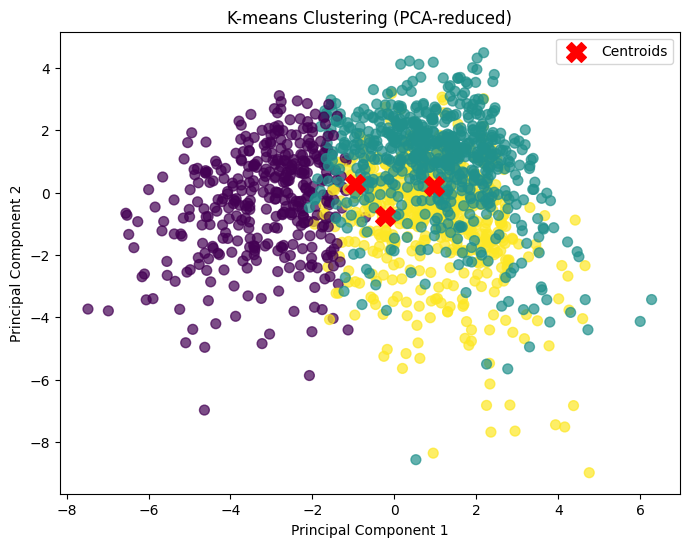

In [83]:
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

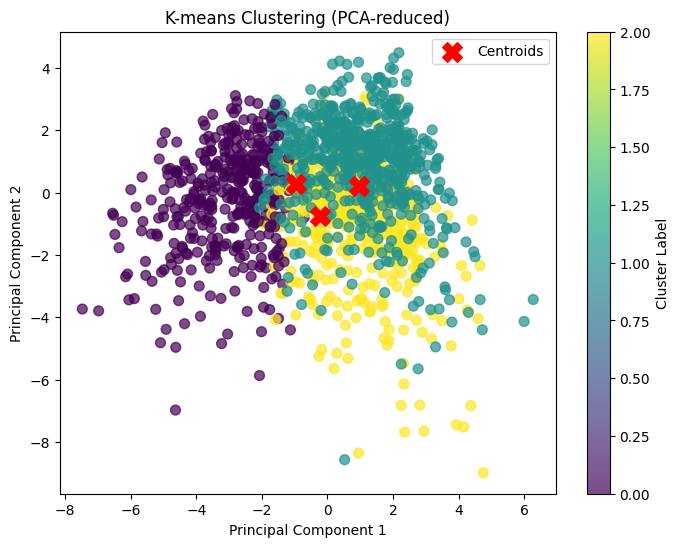

In [84]:
# Plot the clusters with a color bar
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.legend()
plt.show()

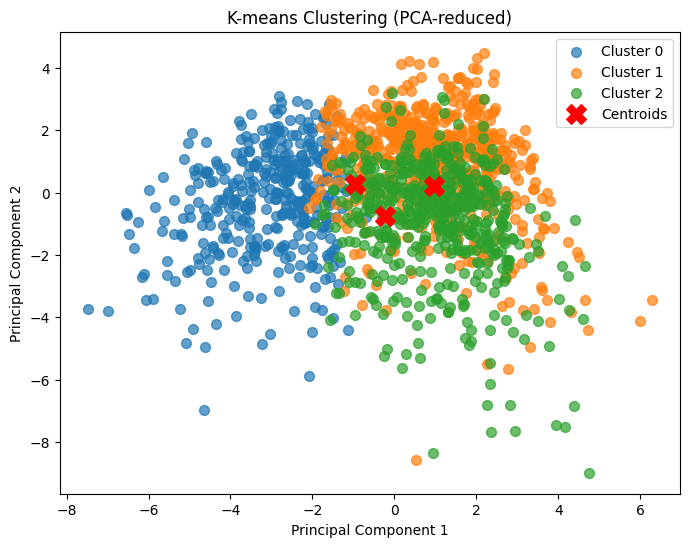

In [85]:
# Plot the clusters with a legend
plt.figure(figsize=(8, 6))

# Create a scatter plot for each cluster
for cluster_label in np.unique(kmeans_optimal.labels_):
    plt.scatter(df1_pca[kmeans_optimal.labels_ == cluster_label, 0],
                df1_pca[kmeans_optimal.labels_ == cluster_label, 1],
                label=f'Cluster {cluster_label}', s=50, alpha=0.7)

# Plot the centroids
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()